# **Glass Identification**

**Project Type- Supervised Learning(Classification)**

**Contribution- Individual**

**Name- Vikash Kumar Diwakar**

# **Project Workflow:**

* **Importing Neccessary Libraries**

* **Data Wrangling**

1. Gathering Data

* CSV and others files

* APIs

* Web Scraping

* Databases

2. Assessing Data
3. Cleaning Data

**EDA and Features Engineering on features**

**Features Transformation and selection**

**Remove Multicollinearity**

**model implementation and pre-processing**

1. Train, Test and Split
2. preprocessing using column-transformer

**Fitting the regression models and HyperParameter Tuning**

**Final selection of the model**

**Conclusion**

**Problem Statement**

The dataset describes the chemical properties of glass and involves classifying samples of glass
using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At
the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

**Attribute Information**

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-
10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)

• 1- building_windows_float_processed

• 2- building_windows_non_float_processed

• 3- vehicle_windows_float_processed

• 4- vehicle_windows_non_float_processed (none in this database)

• 5- containers

• 6- tableware

• 7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes
1-4) and non-window glass (classes 5-7).


**Predict :** Type of glass

In [96]:
import pandas as pd
import numpy as np

In [97]:
df = pd.read_csv('/content/glass.csv')
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [98]:
df.shape

(213, 11)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [100]:
df.describe()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [101]:
df.isnull().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

In [102]:
df.isna().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

In [103]:
df.duplicated().sum()

0

In [104]:
df.sample(1)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
104,106,1.52475,11.45,0.0,1.88,72.19,0.81,13.24,0.0,0.34,2


In [105]:
# defining new column names
renamed_cols={'1':'Id number','1.52101':'refractive_index','13.64':'Sodium','4.49':'Magnesium','1.10':'Aluminum','71.78':'Silicon','0.06':'Potassium','8.75':'Calcium','0.00':'Barium','0.00.1':'Iron','1.1':'Type_of_glass'}

In [106]:
# renaming columns
df=df.rename(columns=renamed_cols)

In [107]:
df.sample(1)

,Id number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
77,79,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.0,0.14,2


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df.drop(columns=['Id number'],inplace=True)

In [110]:
df.head()

,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


# **Data Wrangling**

# **`Magnesium`**

In [111]:
df['Magnesium'].unique()

array([3.6 , 3.55, 3.69, 3.62, 3.61, 3.58, 3.46, 3.66, 3.43, 3.56, 3.59,
       3.54, 3.67, 3.85, 3.73, 3.75, 3.57, 3.5 , 3.48, 3.52, 3.49, 3.47,
       3.45, 3.53, 3.82, 3.42, 3.39, 3.84, 3.37, 3.7 , 3.77, 3.35, 3.72,
       3.33, 2.87, 2.84, 2.81, 2.71, 3.74, 3.86, 3.81, 3.65, 3.87, 3.09,
       3.44, 3.41, 3.34, 3.25, 2.88, 2.96, 2.85, 2.72, 2.76, 3.15, 2.9 ,
       0.  , 3.83, 3.97, 3.89, 3.9 , 3.68, 3.64, 3.76, 2.28, 2.09, 1.35,
       1.01, 3.98, 3.93, 3.8 , 3.63, 3.51, 3.18, 3.4 , 3.36, 3.78, 2.68,
       1.85, 1.88, 1.71, 1.61, 0.33, 2.39, 2.41, 2.24, 2.19, 1.74, 0.78,
       3.2 , 3.26, 2.2 , 1.83, 1.78])

<Axes: xlabel='Magnesium', ylabel='Count'>

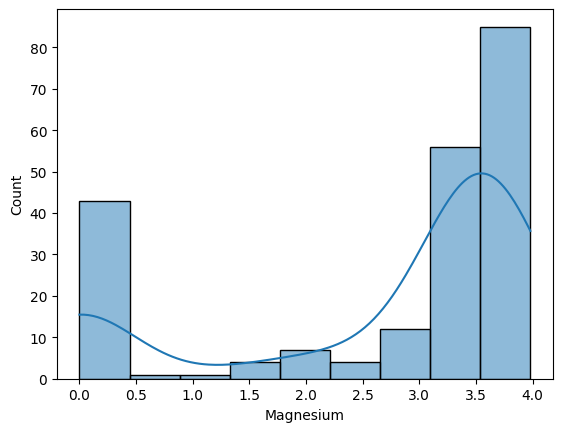

In [112]:
sns.histplot(df['Magnesium'],kde=True)

In [113]:
mean_Magnesium=round(df[~df['Magnesium'].isnull()]['Magnesium'].mean(),2)
median_Magnesium=df[~df['Magnesium'].isnull()]['Magnesium'].median()
[mean_Magnesium,median_Magnesium]

[2.68, 3.48]

In [114]:
df['Magnesium']=df['Magnesium'].replace(0,mean_Magnesium)

# **`Potassium`**

In [123]:
df['Potassium'].unique()

array([0.48, 0.39, 0.57, 0.55, 0.64, 0.58, 0.56, 0.67, 0.6 , 0.69, 0.54,
       0.61, 0.15, 0.06, 0.03, 0.59, 0.62, 0.5 , 0.65, 0.51, 0.11, 0.17,
       0.02, 0.13, 0.09, 0.14, 0.12, 0.23, 0.  , 0.18, 0.19, 0.16, 0.72,
       0.66, 0.37, 0.68, 1.1 , 0.45, 0.38, 0.63, 0.44, 0.07, 0.73, 0.7 ,
       0.35, 0.08, 0.81, 0.1 , 0.49, 0.53, 0.33, 0.52, 1.68, 0.47, 0.97,
       0.32, 6.21, 0.76, 1.76, 1.46, 0.31, 0.04, 0.05, 2.7 , 1.41])

<Axes: xlabel='Potassium', ylabel='Count'>

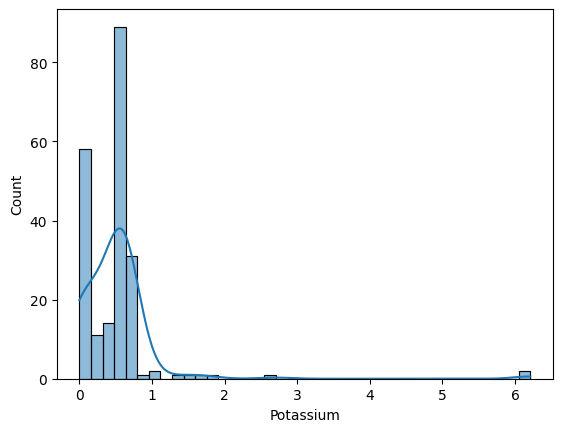

In [124]:
sns.histplot(df['Potassium'],kde=True)

In [125]:
mean_Potassium=round(df[~df['Potassium'].isnull()]['Potassium'].mean(),2)
median_Potassium=df[~df['Potassium'].isnull()]['Potassium'].median()
[mean_Potassium,median_Potassium]

[0.5, 0.56]

In [126]:
df['Potassium']=df['Potassium'].replace(0,median_Potassium)

# **`Barium`**

In [132]:
df['Barium'].unique()

array([0.  , 0.09, 0.11, 0.69, 0.14, 3.15, 0.27, 0.06, 0.15, 2.2 , 0.24,
       1.19, 1.63, 1.68, 0.76, 0.64, 0.4 , 1.59, 1.57, 0.61, 0.81, 0.66,
       0.53, 0.63, 0.56, 1.71, 0.67, 1.55, 1.38, 2.88, 0.54, 1.06, 1.64,
       1.67])

<Axes: xlabel='Barium', ylabel='Count'>

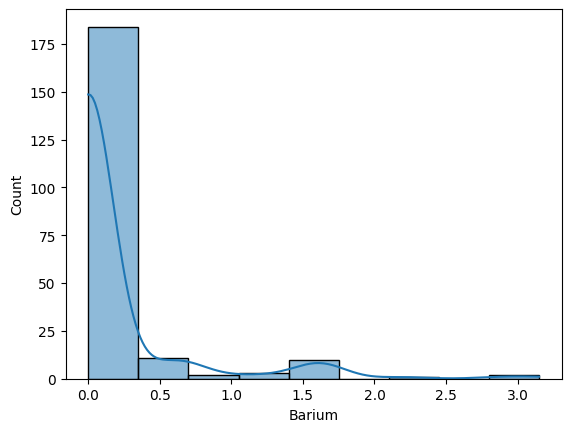

In [133]:
sns.histplot(df['Barium'],kde=True)

In [134]:
mean_Barium=round(df[~df['Barium'].isnull()]['Barium'].mean(),2)
median_Barium=df[~df['Barium'].isnull()]['Barium'].median()
[mean_Barium,median_Barium]

[0.18, 0.0]

In [135]:
df['Barium']=df['Barium'].replace(0,mean_Barium)

# **`Iron`**

In [138]:
df['Iron'].unique()

array([0.  , 0.26, 0.11, 0.24, 0.17, 0.07, 0.19, 0.14, 0.22, 0.06, 0.3 ,
       0.16, 0.1 , 0.09, 0.31, 0.03, 0.12, 0.32, 0.15, 0.2 , 0.34, 0.28,
       0.08, 0.29, 0.21, 0.18, 0.25, 0.35, 0.37, 0.51, 0.05, 0.01])

<Axes: xlabel='Iron', ylabel='Count'>

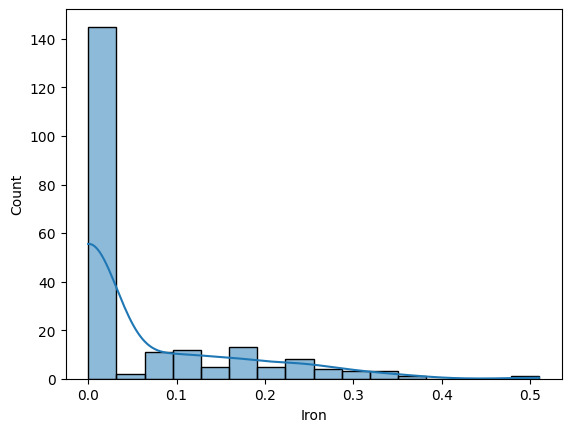

In [140]:
sns.histplot(df['Iron'],kde=True)

In [141]:
mean_Iron=round(df[~df['Iron'].isnull()]['Iron'].mean(),2)
median_Iron=df[~df['Iron'].isnull()]['Iron'].median()
[mean_Iron,median_Iron]

[0.06, 0.0]

In [142]:
df['Iron']=df['Iron'].replace(0,mean_Iron)

# **`Type_of_glass`**

In [145]:
df['Type_of_glass'].unique()

array([1, 2, 3, 5, 6, 7])

In [146]:
df['Type_of_glass']=df['Type_of_glass'].apply(lambda x : 1 if x in [1,2,3,4] else 0)

In [147]:
df['Type_of_glass'].unique()

array([1, 0])

In [148]:
df['Type_of_glass'].value_counts()

Type_of_glass
1    162
0     51
Name: count, dtype: int64

# **Viewing Class Imbalance**

<Axes: xlabel='Type_of_glass', ylabel='count'>

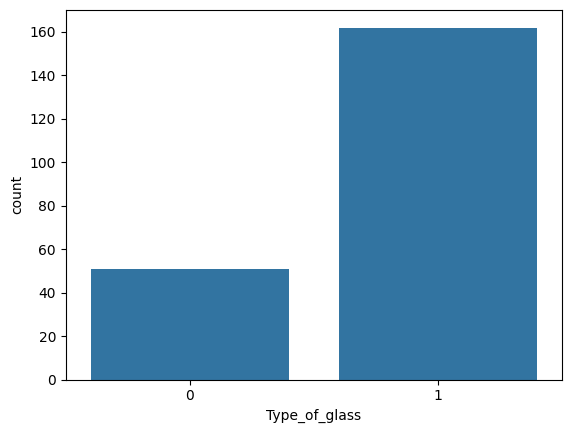

In [150]:
sns.countplot(x=df['Type_of_glass'])

# **Handling Class Imbalance**

# **SMOTE** - Synthetic Minority Oversampling Technique

In [151]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'Type_of_glass')], df['Type_of_glass'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 213
Resampled balanced dataset shape 324


In [153]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'Type_of_glass'))

In [154]:
#adding target variable to new created dataframe
balanced_df['Type_of_glass'] = y_smote

<Axes: xlabel='Type_of_glass', ylabel='count'>

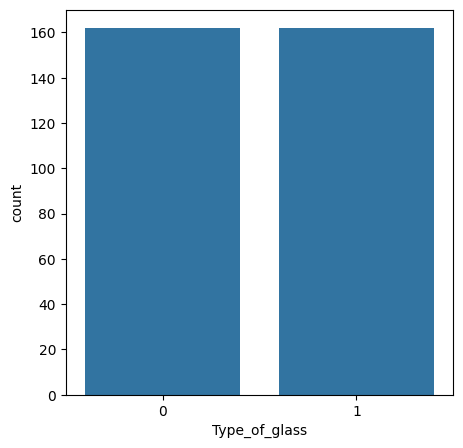

In [156]:
#check for class imbalance
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.countplot( x=balanced_df['Type_of_glass'],data=balanced_df)

# **Analyzing Multicollinearity using Heatmap**

<Axes: >

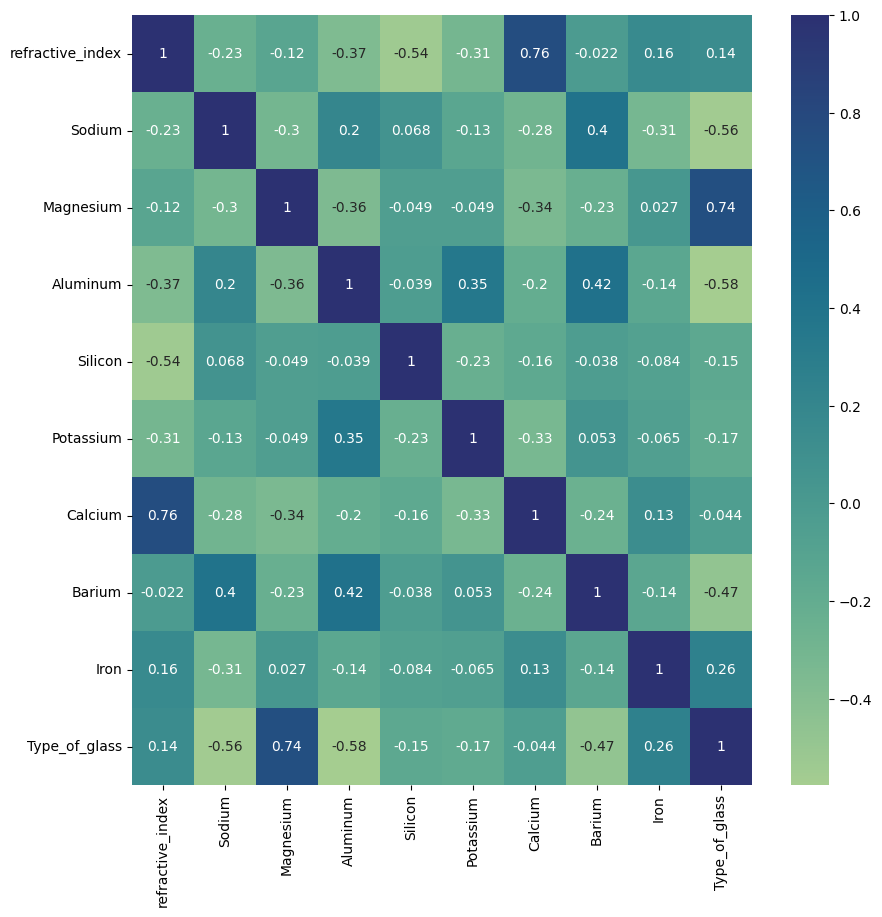

In [157]:
plt.figure(figsize=(10,10))
sns.heatmap(balanced_df.corr(),annot=True,cmap="crest")

In [158]:
balanced_df.head()

,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.18,0.06,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.18,0.06,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.18,0.06,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.18,0.06,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.18,0.26,1


In [159]:
X=balanced_df.drop(columns=['Type_of_glass'])
y=balanced_df['Type_of_glass']

In [160]:
X.shape

(324, 9)

In [161]:
y.shape

(324,)

# **Data Transformation**

In [162]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# **Train Test Splitting**

In [164]:
# importing libraries and train test splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [165]:
X_train.shape

(259, 9)

In [166]:
X_test.shape

(65, 9)

# **Implementing BaseLine Models**

# **Logistic Regression**

In [167]:
#importing logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [168]:
#fitting data into Logistic Regression
logi = LogisticRegression()
logi.fit(X_train,y_train)

LogisticRegression()

In [169]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [170]:
#getting all scores for Logistic Regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.981
The accuracy on test data is  0.923
The precision on test data is  0.971
The recall on test data is  0.892
The f1 on test data is  0.93
The roc_score on test data is  0.928


[[27  4]
 [ 1 33]]


[Text(0, 0.5, 'window glass'), Text(0, 1.5, ' non window glass')]

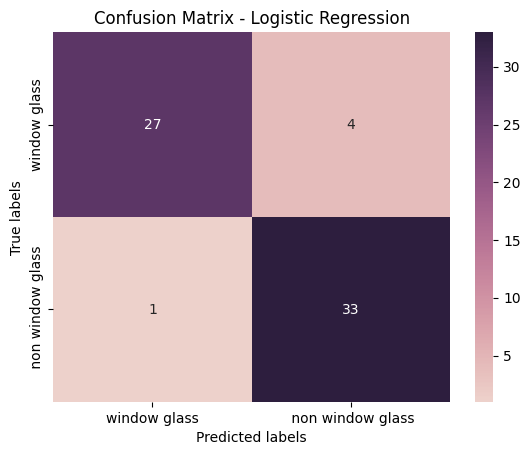

In [171]:
# Get the confusion matrix
labels = ['window glass', ' non window glass']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax, cmap=sns.cubehelix_palette(as_cmap=True))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **DecisionTree Classifier**

In [172]:
# importing decisiontree
from sklearn.tree import DecisionTreeClassifier

In [173]:
# creating object anf fitting the model
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [174]:
# class predicting y
y_pred_dtc=dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [175]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  1.0
The accuracy on test data is  0.954
The precision on test data is  0.971
The recall on test data is  0.943
The f1 on test data is  0.957
The roc_score on test data is  0.955


[[29  2]
 [ 1 33]]


[Text(0, 0.5, 'window glass'), Text(0, 1.5, ' non window glass')]

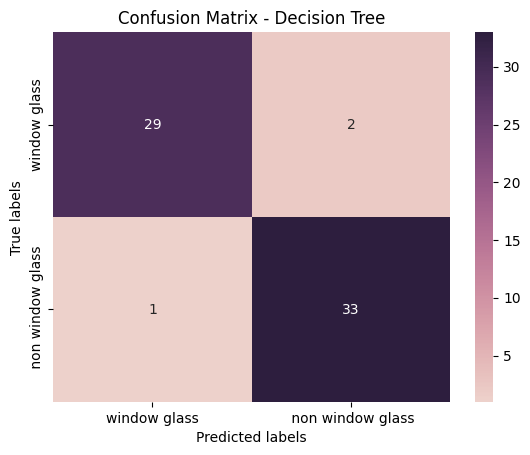

In [194]:
# Get the confusion matrix
labels = ['window glass', ' non window glass']
cm_logi = confusion_matrix(y_test, y_pred_dtc )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax, cmap=sns.cubehelix_palette(as_cmap=True))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **RandomForest Classifier**

In [178]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [179]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [180]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [181]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  1.0
The accuracy on test data is  0.938
The precision on test data is  0.941
The recall on test data is  0.941
The f1 on test data is  0.941
The roc_score on test data is  0.938


[[29  2]
 [ 2 32]]


[Text(0, 0.5, 'window glass'), Text(0, 1.5, ' non window glass')]

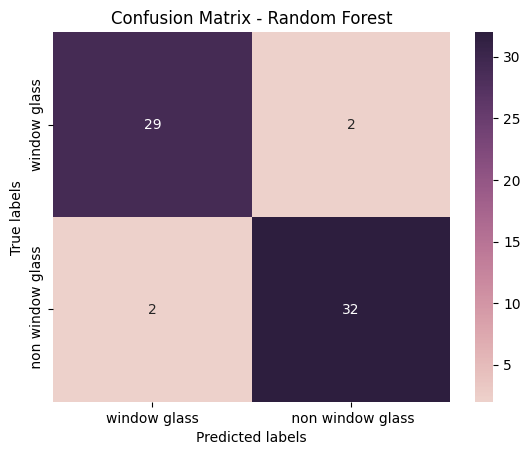

In [201]:
# Get the confusion matrix
labels = ['window glass', ' non window glass']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax, cmap=sns.cubehelix_palette(as_cmap=True))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Support Vector Machines**

In [196]:
#importing Support Vector Classifier
from sklearn.svm import SVC

In [197]:
#fitting data into Support Vector Classifier
svm=SVC(probability=True)
svm.fit(X_train,y_train)

SVC(probability=True)

In [198]:
#class prediction of y
y_pred_svm=svm.predict(X_test)
y_train_pred_svm=svm.predict(X_train)

In [199]:
#getting all scores for Support Vector Classifier
train_accuracy_svm = round(accuracy_score(y_train_pred_svm,y_train), 3)
accuracy_svm = round(accuracy_score(y_pred_svm,y_test), 3)
precision_score_svm = round(precision_score(y_pred_svm,y_test), 3)
recall_score_svm = round(recall_score(y_pred_svm,y_test), 3)
f1_score_svm = round(f1_score(y_pred_svm,y_test), 3)
roc_score_svm = round(roc_auc_score(y_pred_svm,y_test), 3)

print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", accuracy_svm)
print("The precision on test data is ", precision_score_svm)
print("The recall on test data is ", recall_score_svm)
print("The f1 on test data is ", f1_score_svm)
print("The roc_score on test data is ", roc_score_svm)

The accuracy on train data is  0.988
The accuracy on test data is  0.938
The precision on test data is  0.941
The recall on test data is  0.941
The f1 on test data is  0.941
The roc_score on test data is  0.938


[[29  2]
 [ 2 32]]


[Text(0, 0.5, 'window glass'), Text(0, 1.5, ' non window glass')]

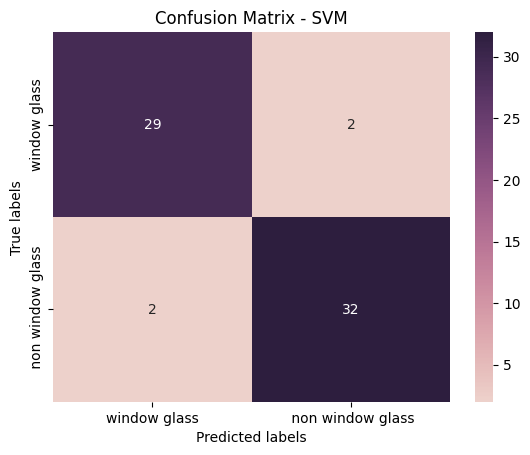

In [200]:
# Get the confusion matrix
labels = ['window glass', ' non window glass']
cm_svm = confusion_matrix(y_test, y_pred_svm )
print(cm_svm)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax, cmap=sns.cubehelix_palette(as_cmap=True))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SVM')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Gradient Boosting Classifier**

In [183]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [184]:
#fitting data into Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [185]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

In [186]:
#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 3)
roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  1.0
The accuracy on test data is  0.938
The precision on test data is  0.941
The recall on test data is  0.941
The f1 on test data is  0.941
The roc_score on test data is  0.938


[[29  2]
 [ 2 32]]


[Text(0, 0.5, 'window glass'), Text(0, 1.5, ' non window glass')]

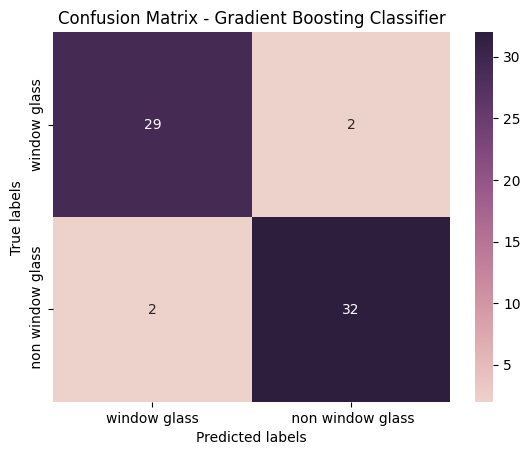

In [202]:
# Get the confusion matrix
labels = ['window glass', ' non window glass']
cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax, cmap=sns.cubehelix_palette(as_cmap=True))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **XG Boosting**

In [189]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier

In [190]:
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [191]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)

In [192]:
#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  1.0
The accuracy on test data is  0.954
The precision on test data is  0.971
The recall on test data is  0.943
The f1 on test data is  0.957
The roc_score on test data is  0.955


[[29  2]
 [ 1 33]]


[Text(0, 0.5, 'window glass'), Text(0, 1.5, ' non window glass')]

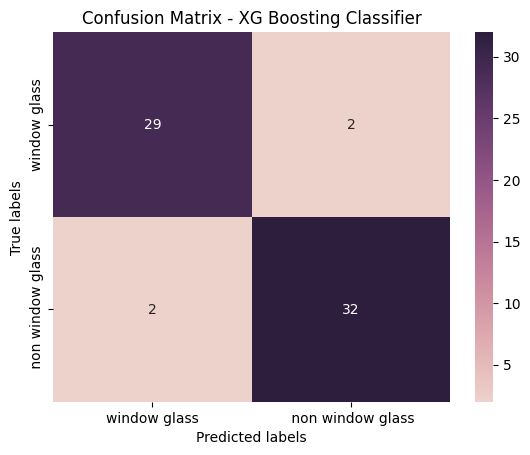

In [203]:
# Get the confusion matrix
labels = ['window glass', ' non window glass']
cm_xgb = confusion_matrix(y_test, y_pred_xgb )
print(cm_xgb)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax, cmap=sns.cubehelix_palette(as_cmap=True))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XG Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Baseline Model Comparison**

In [204]:
all_lassifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_logi, train_accuracy_dtc, train_accuracy_rfc, train_accuracy_svm, train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_logi, accuracy_dtc, accuracy_rfc, accuracy_svm, accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_logi, precision_score_dtc, precision_score_rfc, precision_score_svm, precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_logi, recall_score_dtc, recall_score_rfc, recall_score_svm, recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_logi, f1_score_dtc, f1_score_rfc, f1_score_svm, f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_logi, roc_score_dtc, roc_score_rfc, roc_score_svm, roc_score_gbc, roc_score_xgb]

In [205]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})


In [206]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.981,0.923,0.971,0.892,0.930,0.928
1,Decision Tree,1.000,0.954,0.971,0.943,0.957,0.955
2,Random Forest,1.000,0.938,0.941,0.941,0.941,0.938
3,SVM,0.988,0.938,0.941,0.941,0.941,0.938
4,Gradient Boosting,1.000,0.938,0.941,0.941,0.941,0.938
5,XG Boosting,1.000,0.954,0.971,0.943,0.957,0.955


In [207]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
1,Decision Tree,1.000,0.954,0.971,0.943,0.957,0.955
5,XG Boosting,1.000,0.954,0.971,0.943,0.957,0.955
2,Random Forest,1.000,0.938,0.941,0.941,0.941,0.938
3,SVM,0.988,0.938,0.941,0.941,0.941,0.938
4,Gradient Boosting,1.000,0.938,0.941,0.941,0.941,0.938
0,Logistic Regression,0.981,0.923,0.971,0.892,0.930,0.928


# **Combined ROC Curve for all models**

In [208]:
#importing roc curve
from sklearn.metrics import roc_curve

In [209]:
#probabilty prediction of y for all model
y_pred_proba_logi = logi.predict_proba(X_test)[:,1]
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
y_pred_proba_svm = svm.predict_proba(X_test)[:,1]
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

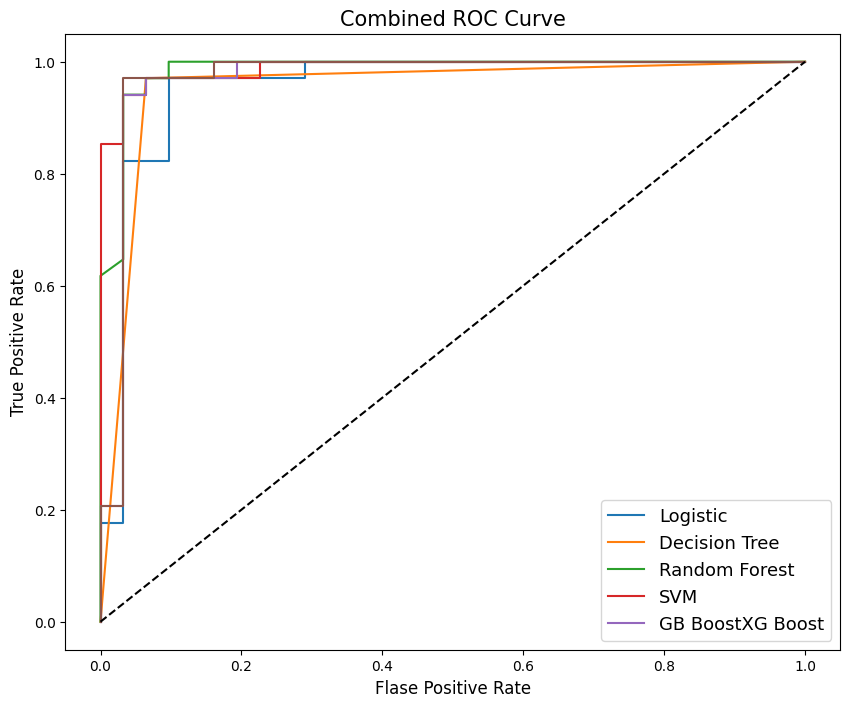

In [210]:
fig = plt.figure(figsize=(10,8))

fpr_logi, tpr_logi, _logi = roc_curve(y_test,  y_pred_proba_logi)
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,  y_pred_proba_dtc)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_svm, tpr_svm, _svm = roc_curve(y_test,  y_pred_proba_svm)
fpr_gbc, tpr_gbc, _gbc = roc_curve(y_test,  y_pred_proba_gbc)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)

plt.plot(fpr_logi, tpr_logi)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_svm, tpr_svm)
plt.plot(fpr_gbc, tpr_gbc)
plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic", "Decision Tree", "Random Forest", "SVM", "GB Boost" "XG Boost"], prop={'size':13}, loc='lower right' )

# **Feature Importance of Decision Tree**

In [212]:
features = list(i for i in list(balanced_df.describe(include='all').columns) if i != 'Type_of_glass')

In [214]:
feature_importances_dtc = dtc.feature_importances_

In [215]:
feature_importances_dtc_df = pd.Series(feature_importances_dtc, index=features)

In [216]:
feature_importances_dtc_df.sort_values(ascending=False)[0:15]

Magnesium           0.802184
Calcium             0.145683
Iron                0.029479
Potassium           0.012357
refractive_index    0.010297
Sodium              0.000000
Aluminum            0.000000
Silicon             0.000000
Barium              0.000000
dtype: float64

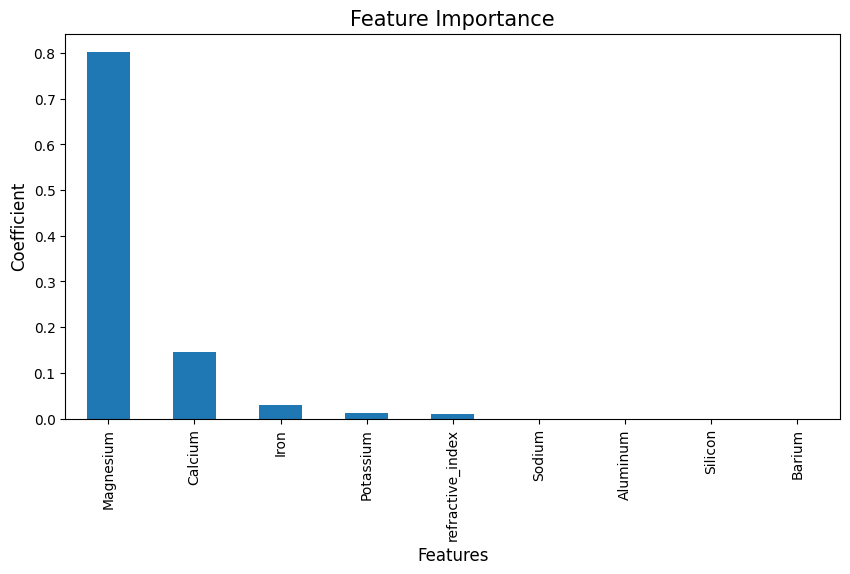

In [218]:
fig = plt.figure(figsize=(10,5))
feature_importances_dtc_df.nlargest(15).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

# **Cross Validation and HyperParameter Tuning**

# **Optimized Decision Tree Model**

In [219]:
from sklearn.model_selection import GridSearchCV

In [220]:
# The maximum depth of the tree
depth_of_tree = [20,25,30]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [221]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
dtc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='roc_auc', verbose=3)

In [222]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=40,
                       min_samples_split=0.05)

In [223]:
dtc_grid.best_params_

{'max_depth': 20, 'min_samples_leaf': 40, 'min_samples_split': 0.05}

In [224]:
dtc_optimal_model = dtc_grid.best_estimator_

In [225]:
#class prediction of y on train and test
y_pred_dtc_grid=dtc_optimal_model.predict(X_test)
y_train_pred_dtc_grid=dtc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_test)[:,1]

In [226]:
#getting all scores for decision tree after CV and Hyperparameter Tunning
train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 3)
accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test), 3)
precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test), 3)
recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test), 3)
f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test), 3)
auc_dtc_grid = round(roc_auc_score(y_pred_dtc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc_grid)
print("The accuracy on test data is ", accuracy_dtc_grid)
print("The precision on test data is ", precision_score_dtc_grid)
print("The recall on test data is ", recall_score_dtc_grid)
print("The f1 on test data is ", f1_score_dtc_grid)
print("The auc on test data is ", auc_dtc_grid)

The accuracy on train data is  0.942
The accuracy on test data is  0.923
The precision on test data is  0.882
The recall on test data is  0.968
The f1 on test data is  0.923
The auc on test data is  0.925


In [227]:
# Get the confusion matrices for train and test
train_cm_dtc_grid = confusion_matrix(y_train,y_train_pred_dtc_grid)
test_cm_dtc_grid = confusion_matrix(y_test,y_pred_dtc_grid )

In [228]:
train_cm_dtc_grid

array([[125,   6],
       [  9, 119]])

In [229]:
test_cm_dtc_grid

array([[30,  1],
       [ 4, 30]])

# **Conclusion**

* `Decision Tree Classifier` and `XG boosting` gave same result.
* selcted Decision Tree Classifier as best model giving Test Accuracy of **95.4%** and AUC of **95.5%**.
* `Magnesium` was the most important feature.
* did a hyperparameter tuning for the same and its reduced the training score from 100% to 94.2% i.e; our model was overfitted and after tuning it solved the issue of overfitting.